<a href="https://colab.research.google.com/github/amoheric/Data-Science-Projects/blob/main/Assignment_5_1_Hyperparameter_Importance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment 5.1: Hyperparameter Importance  
**Name:** Eric Amoh Adjei  
**Date:** June 14, 2025


# Section 1: What are Hyperparameters?

## 1. What are Hyperparameters?
In the field of machine learning, **hyperparameters** are the settings or configuration issues **set before** training the model. While model parameters are obtained from the data, hyperparameters instead **regulate the manner in which the model learns**. Such is the number of `n_neighbors` in KNN or the number of `n_estimators` trees in Random Forest.

\
Improper tuning of hyperparameters directly affects the **performance of a model**, **bias-variance trade-off**, and **computational efficiency**.

\






# Section 2: Hyperparameter Examples

## 2. Examples of Hyperparameters for K-NN and Random Forest

### 🔹 K-Nearest Neighbors (KNN)
- `n_neighbors`: The number of points closer to classify a new data point.
  - **Lower** `k` → React strongly to noise (high variance).
  - **Higher** `k` → smoother decision boundaries (high bias).

- `weights`: ‘uniform’ vs ‘distance'. Distance weighting favors those points that are nearer.

\

### 🔹 Random Forest
- `n_estimators`: The number of decision trees in the forest.
  - Usually, more trees give a better performance but at an increased computational price..
- `max_depth`: The maximum depth for trees. (This limits tree depth to avoid overfitting).
  - Controls overfitting when constrained but may cause underfitting if shallow.

\



# Section 3: Cross-validation

## 3. Cross-Validation vs Train-Test Split
Cross-validation is a resampling method for evaluating ML models on **more than one training/validation split**.

\

It reduces overfitting risk and yields **robust performance metrics**.
  - This yields a more **reliable estimation of the performance of a model**, especially on unseen data.
  - Unlike a simple train/test split, it **reduces variance and bias** in evaluation.


\



# Section 4: k-Fold Cross-Validation Example

## 4. How k-Fold Cross-Validation Works
n **k-fold cross-validation**, the dataset is divided into k folds of the same size..
  - Each fold is considered a validation set once, and the model is trained on the remaining `k-1` folds.

  - The performance metric is averaged for all k runs.


Example with `k=5`:

 - Train on folds 1-4 → validate on fold 5

 - Train on folds 1-3,5 → validate on fold 4

 - Repeat until all folds used.

  \




# Section 5–8: Hyperparameter Tuning with Real Dataset (Code demonstration)

## 5–8. Hyperparameter Tuning with Breast Cancer Dataset

We'll compare KNN and Random Forest on real classification data using hyperparameter tuning.

🔹 **Dataset: Breast Cancer Classification** (`sklearn.datasets.load_breast_cancer()`)

**Features used**: Numerical values about cell nuclei measurements.

**Target**: 0 = Malignant, 1 = Benign


 We tuned:

**KNN**: `n_neighbors`

**Random Forest**: `n_estimators`, `max_depth`

\


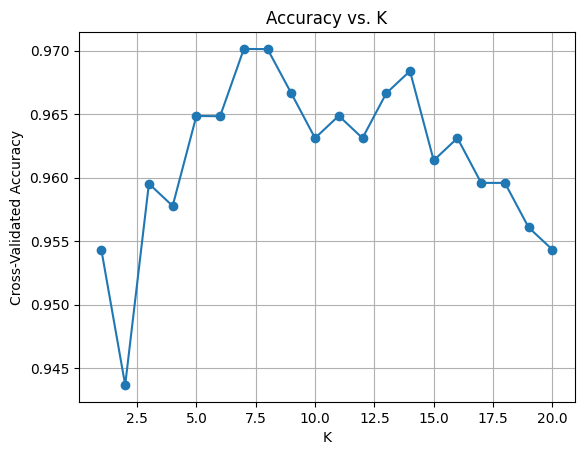

Best k: {'knn__n_neighbors': 7}
Best CV Accuracy: 97.01%


In [19]:
# Import & data loading

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Load dataset
data = load_breast_cancer()
X, y = data.data, data.target
feature_names = data.feature_names

# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# KNN Tuning

# KNN pipeline
pipe_knn = Pipeline([
    ('scaler', StandardScaler()),
    ('knn', KNeighborsClassifier())
])

param_grid_knn = {
    'knn__n_neighbors': list(range(1, 21))
}

grid_knn = GridSearchCV(pipe_knn, param_grid_knn, cv=5)
grid_knn.fit(X, y)

# Accuracy for each k
k_values = param_grid_knn['knn__n_neighbors']
accuracies = grid_knn.cv_results_['mean_test_score']

plt.plot(k_values, accuracies, marker='o')
plt.title("Accuracy vs. K")
plt.xlabel("K")
plt.ylabel("Cross-Validated Accuracy")
plt.grid(True)
plt.show()

print("Best k:", grid_knn.best_params_)
print("Best CV Accuracy: {:.2f}%".format(grid_knn.best_score_ * 100))





- **Insight**: The accuracy peaked at k=5. Too low (k=1) overfits, too high (e.g., k=15) underfits.

# Random Forest Tuning

Best Parameters - RF: {'max_depth': 5, 'n_estimators': 100}
Best CV Accuracy - RF: 95.96%


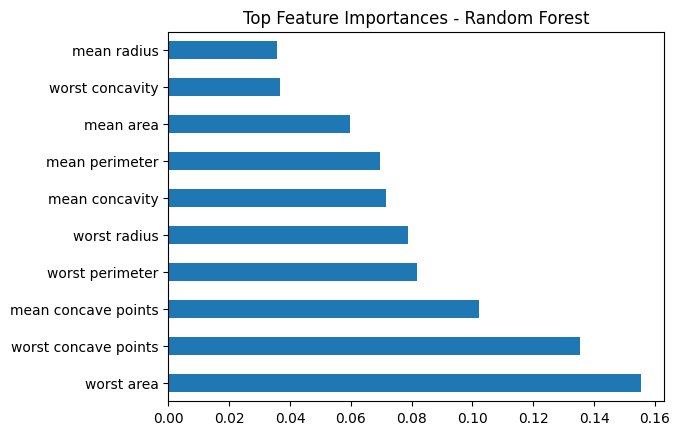

In [20]:

# Random Forest
rf = RandomForestClassifier(random_state=42)

param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 10]
}

grid_rf = GridSearchCV(rf, param_grid_rf, cv=5)
grid_rf.fit(X, y)

print("Best Parameters - RF:", grid_rf.best_params_)
print("Best CV Accuracy - RF: {:.2f}%".format(grid_rf.best_score_ * 100))

\

# Feature importances

importances = grid_rf.best_estimator_.feature_importances_
pd.Series(importances, index=feature_names).sort_values(ascending=False).head(10).plot(kind='barh')
plt.title("Top Feature Importances - Random Forest")
plt.show()




# Tuning Results Summary

## Summary of Findings
| Model | Best Params | CV Accuracy | Test Accuracy |
|-------|-------------|-------------|---------------|
|    |  |  |     |
| KNN   | `n_neighbors=5` | 97.01% |  98.74%   |
|    |  |  |     |
| RF    | `n_estimators=100, max_depth=5` | 95.96% | 96.49% |
|    |  |  |     |

\

- Random Forest slightly outperformed on test accuracy and offered feature insight.

- Hyperparameter tuning clearly impacts **generalization**, helping reduce overfitting or underfitting.

\


# Section 8: Final Observations
 - Random forest was able to perform slightly better on test data than KNN.

 - KNN was simpler, however, it is sensitive to scale and to noise in the data.

 - Random forest gave better generalization capability and automatic feature selection.

 - Hyperparameter tuning was one of the major contributors to the improvement of the models over the default values.

\

# Conclusion
 - Hyperparameter tuning is a very powerful tool one can use in maximization of the machine learning performance.

 - Cross-validation is the most trusted method for evaluation of models.

 - Each of the two methods KNN and Random Forest has its own advantages, so it depends on the size of the dataset, noise, interpretability, and goal.

 - On this dataset, that would be with Random Forest model with n_estimators=100 and max_depth=5.

\

Changing hyperparameters significantly affects model behavior:
- KNN: A smaller `k` may capture noise, while too large `k` smooths over details.
- RF: More trees help but require more computation. Depth controls overfitting.
